# Step 1: Model Selection

As a team, we have decided to select Modeling non-stationarity and finding an equilibrium as our model of choice. 

## Stationarity

A stationary time series data is a data with constant mean, variance and covariance. Stationary series should not have trend and the data do not varies with time.

## Methods to Check Stationarity
1. **Visual Test**: Visually check the plotted data and ACF plot t check whether have trend or change with time.
2. **Unit Root Test: ADF (Augmented Dickey Fuller) Test**: to identify the existence of unit root in the time series data. The Null Hypothesis is the series with unit root (a =1). The series is non-stationary if fail to reject null hypothesis. 


# Step 2: Dataset Selection

## 1. First Dataset - XOM stock
Using example of Exxon Mobile (XOM) stock, we will extract the daily adjusted closed price data from Year 2019 to 2024 and visually check if the data is stationary.


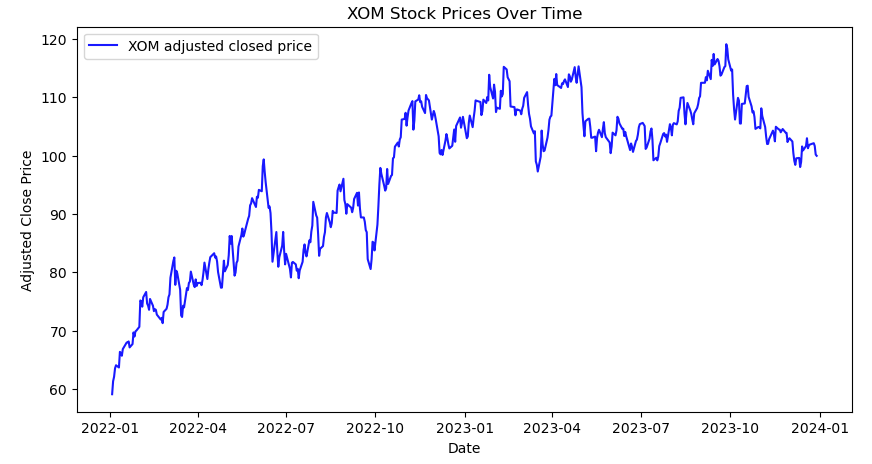

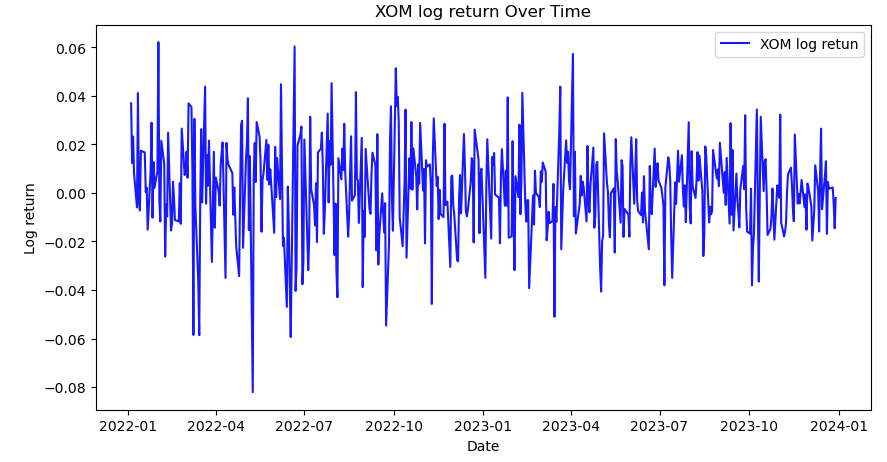

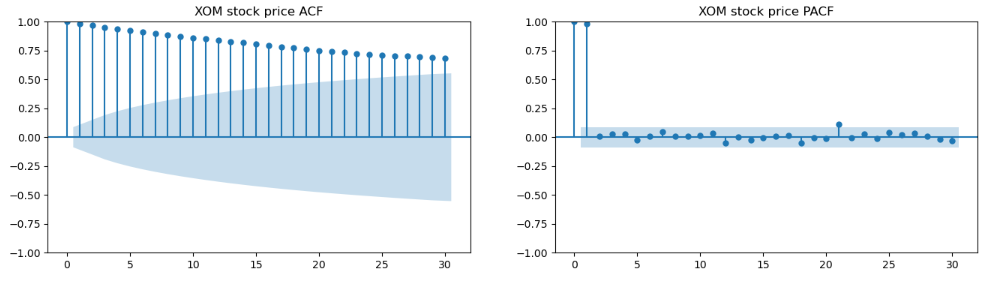

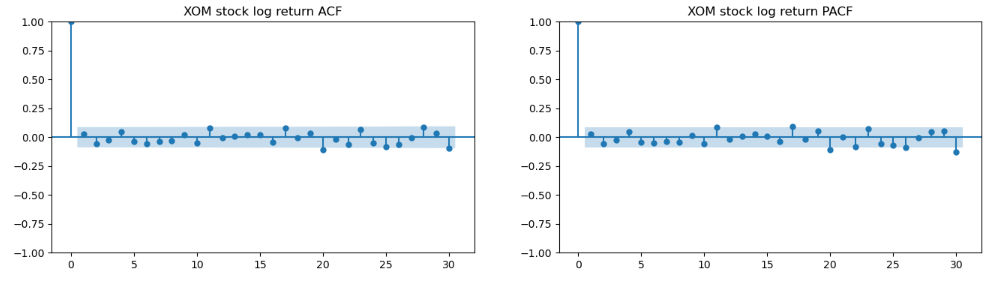

From the stock price plot above, we can clearly observed that the data is **non-stationary** as there is a **trend with varying mean**. From ACF plot, also observed a slow decreasing autocorrelations, which means that there is a trend in time series and non-stationary. For PACF plot, lag 21 is positive and significant autocorrelations. While for log return, ACF & PACF shows that it might be stationary.
However, the visual approach will not give accurate results, thus, we will confirm this observation with statistical test using ADF (Augmented Dickey Fuller) Test.

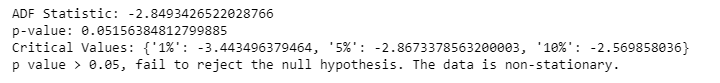

From the ADF test results above, the XOM daily adjusted closed price is **non-stationary** time series as **$p > 0.05$**.

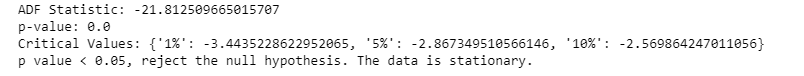

From the ADF test results above, the XOM log return is **stationary** time series as **$p < 0.05$**.

## 2. Second Dataset - AMZN stock

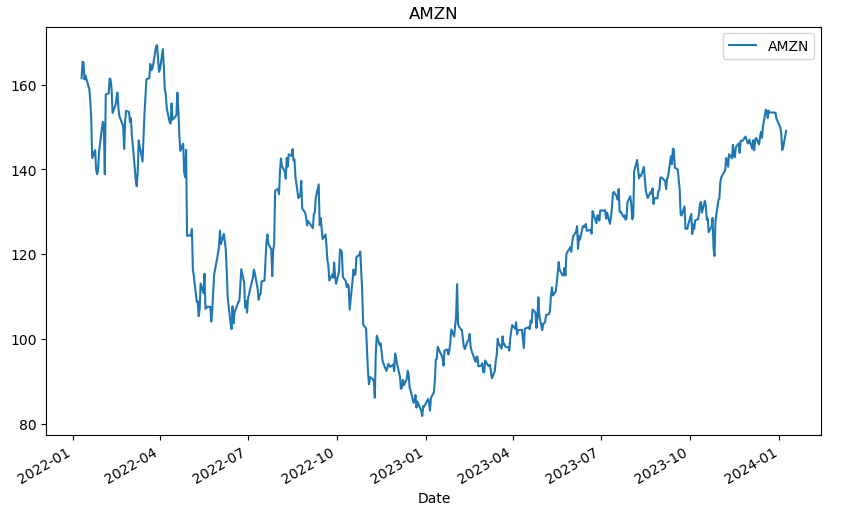

The plot of the time series for AMZN stock reveals a mean that is not constant and a variance that fluctuates. To formally assess the stationarity of the series, we employ the Augmented Dickey-Fuller (ADF) test. The ADF test is a statistical method designed to test the following hypotheses:

Null Hypothesis ($H_0$): The time series data contains a unit root, indicating it is <u> not</u> stationary.

Alternative Hypothesis ($H_1$): There is no unit root present in the time series data, suggesting that it is stationary.

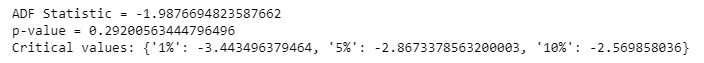

Based on the outcomes of the ADF test, it's concluded that our time series is <u>not</u> stationary as the p-value exceeds 0.05 and the absolute value of ADF statistic is **higher** than the 1% critical value of the ADF test.

## 3. Third Dataset - Bitcoin

We will use **Bitcoin** daily price data in USD for the last 2 years as the dataset. First, we are going to test if the **BTC/USD** dataset is stationary, and if not we are going to take the necessary statistical measures to model our non-stationary time series.

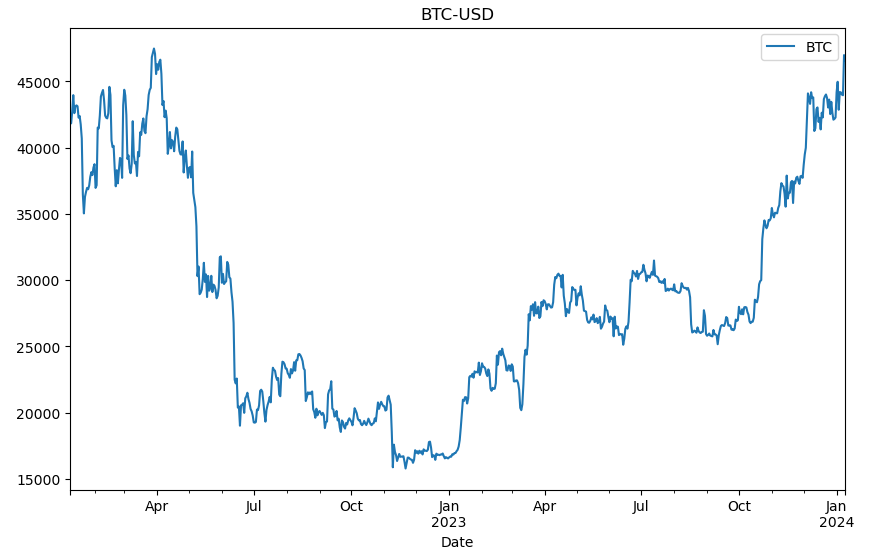

The time series plot show non-constant mean and changing variance. Then we proceed to formally test for **stationarity** with Augmented Dickey-Fuller test. ADF is a statistical test in which the null and alternative hypotheses are as follows:

$H_0:$ There exists a unit root in the time series sample and therefore it is <u> not</u> stationary.

$H_1:$ A unit root <u> does not</u> exist in the time series sample and it is **stationary**.

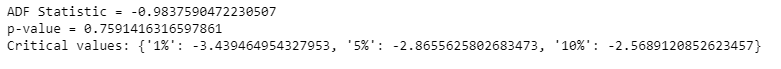

According to the ADF test results, our time series is <u>not</u> stationary because $p > 0.05$.

Then, we can take the **first difference** of our time series and check for stationarity again. However because we know our dataset is the value of financial asset prices, we can use **log returns** as the first difference instead and then check for stationarity:

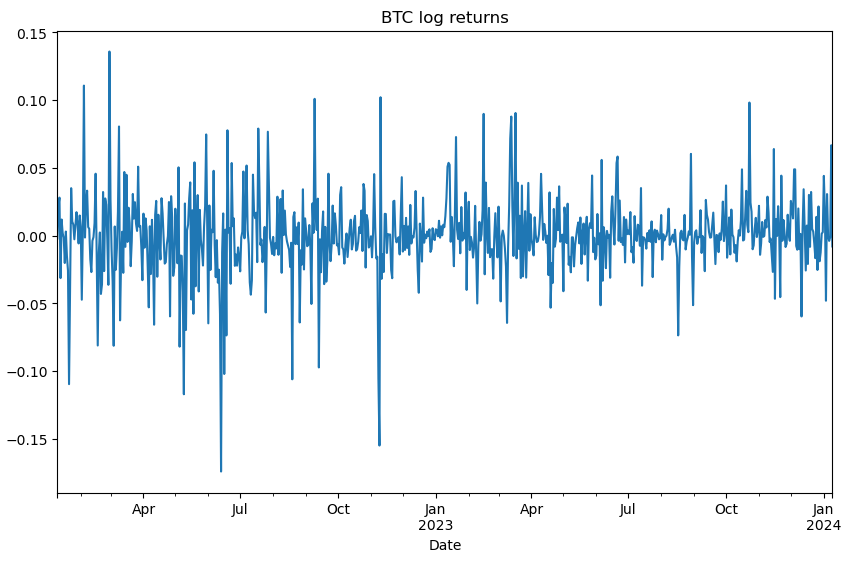

Although we seem to have a constant mean, we also seem to have **volatility clustering** and therefore, non-constant variance for this time series; possibly making it non-stationary. Let's formally check for stationarity of the first difference time series with an ADF test:

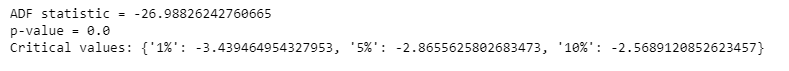

According to the ADF test, log returns of **BTC-USD** time series is **stationary**. Then, this time series is a good candidate for a **GARCH** (Generalized Autoregressive Conditional Heteroscedasticity) model because it is <u>unconditionally homoscedastic</u> but has several volatility clusters and therefore can be considered <u>conditionally heteroscedastic</u> .

The reason for choosing **GARCH** over **ARCH** (Autoregressive Conditional Heteroscedasticity) is because the GARCH model is more **parsimonious** than the ARCH model. This is because in the GARCH model we also include the lagged value of the $\sigma_t^2$ term, which is the variance of the residuals. This weighting allows us to include the impact of past variance as an exponentially decaying factor with a coefficient in our calculation; in contrast to ARCH assumption that the impact of past $\sigma_{t-h}^2$ values decay linearly over time.

Then, let's define the **GARCH** model and describe its use in modeling stationary time series with volatility clusters:

# Step 3: Reason of Dataset Selection

As a team, we have decided to select **Bitcoin** as our dataset selection due to it high volatility in the dynamic financial The selection of high volatility stocks will help to enhances our analysis as it will show broad range of non-stationarity.

## Definition and Description

A **GARCH(p, q)** model is just an extension of an **ARCH(p)** model where we include the past values of $\sigma_t$ on the right hand side. Let {$X_t$} be a <u>stationary</u> asset rate of return (for example log return) time series model such that:

$X_t = \mu + \varepsilon_t$

where

> $X_t:$ Asset rate of return at time $t$

> $\mu:$ <u>Unconditional</u> expected value (mean) of $X_t$, which is a <u>constant</u> 

> $\varepsilon_t:$ innovation term (residual term)

and

$Var(\varepsilon_t) = \sigma_t^2$ 

where $\sigma_t^2$ is a function of $t$ and is <u>not</u> a constant.

For financial asset time series, we generally assume $\mu=0$. If we proceed with this assumption, $X_t = \varepsilon_t$.

Then we define $Var(\varepsilon_t) = \sigma_t^2$ term with the following equation:

$\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2 + \cdots + \alpha_p \varepsilon_{t-p}^2 + \beta_1 \sigma_{t-1}^2 + \cdots + \beta_q \sigma_{t-q}^2$

where

> $\varepsilon_t:$ innovation term (residual term) for time series

> $\sigma_t^2:$ Variance of $\varepsilon_t$

> $\omega:$ A constant term which represents the long-run average variance of $\varepsilon_t$

> $\alpha_i:$ Coefficients of $\varepsilon_{t-i}^2$ values, which represent the reaction of current volatility to past **shocks** (ARCH term). Higher values mean more persistence in volatility due to past shocks.

> $\beta_i:$ Coefficients of $\sigma_{t-i}^2$ values, which represent the persistence of past **volatility** (GARCH term). If beta is high, it indicates that volatility clustering is more persistent.

## Demonstration and Diagrams

First we download and conduct an exploratory data analysis on our raw data.

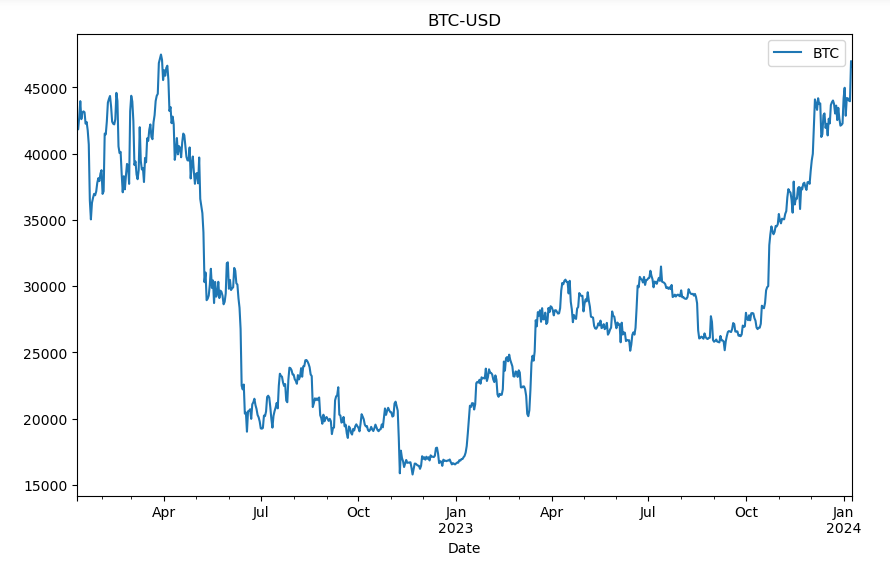

Then, as explained in **Step 2** of our paper, we transform the **BTC-USD** price data into log returns to get a **stationary** time series:

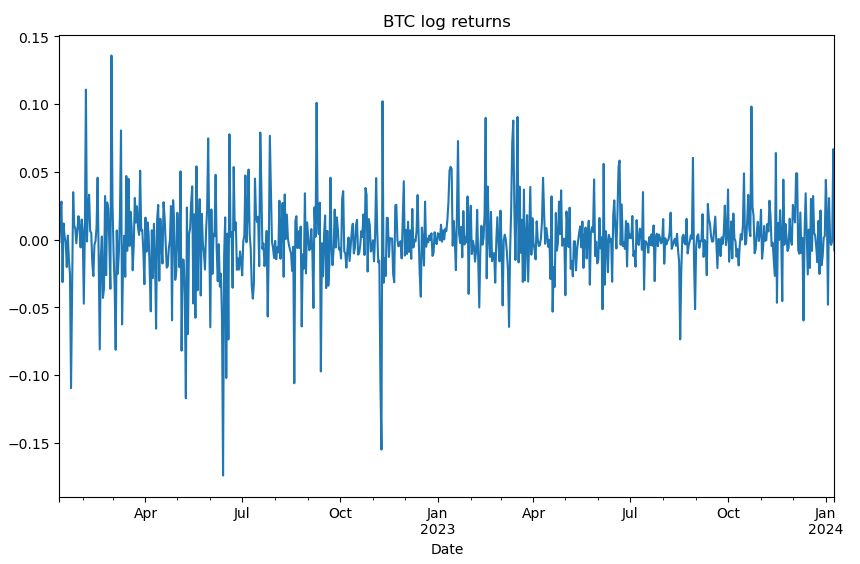

As can be seen in the plot, we are going to address the volatility clusters by fitting a **GARCH(1, 1)** model. We will use the following assumptions in our first model:

* $\mu = 0$

* Innovation terms $\varepsilon_i$ are unconditionally **normally distributed**.

* No **asymmetric** innovation terms are included, such as those in EGARCH

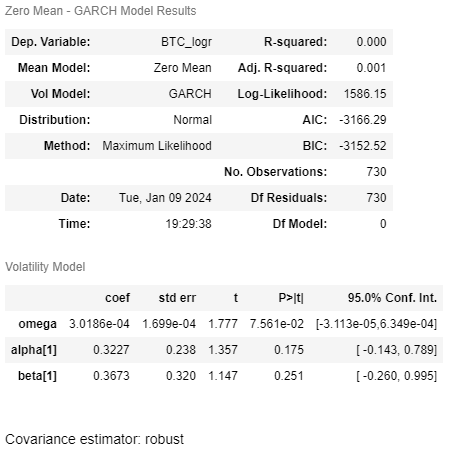

According to our results after the GARCH(1, 1) fit, we have the following equation for describing our estimate of innovation terms, $\hat{\varepsilon_t}$ :

$\hat{\sigma_t^2} = 2.9495 \cdot 10^{-4} + 0.3406 \varepsilon_{t-1}^2 + 0.3613 \sigma_{t-1}^2$

where

> $\hat{\omega} = 2.9495 \cdot 10^{-4}$

> $\hat{\alpha_1} = 0.3406$

> $\hat{\beta_1} = 0.3613$

However, although $\omega$ term is statistically significant according to the results, $\hat{\alpha_1}$ and $\hat{\beta_1}$ coefficient estimates are **not** significant at the $5 \%$ level. This means we might need to re-calibrate our model to get statistically significant coefficient estimates.

Before reviewing our assumptions and re-calibrating our model, let's show an exploratory plot for our model:

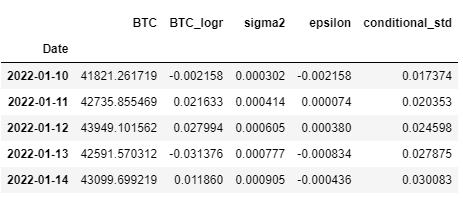

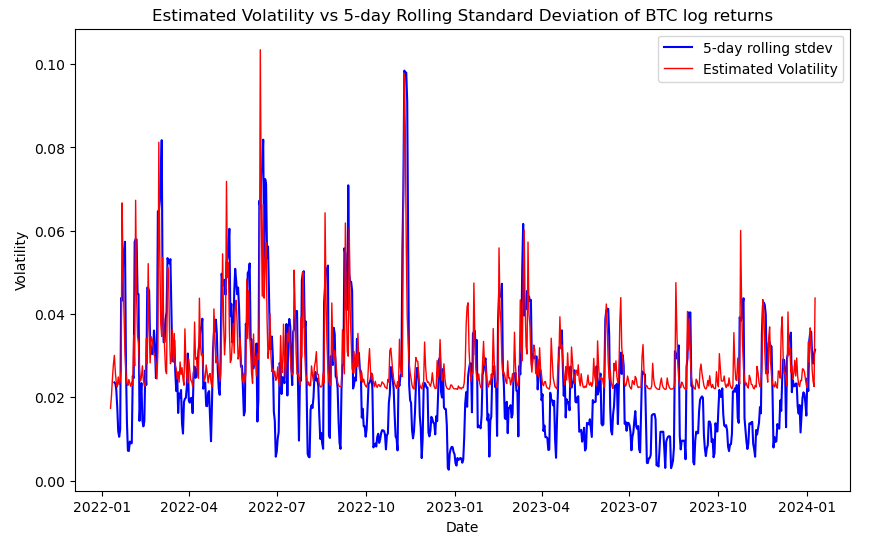

As can be seen on the plot, although our volatility estimates have a higher minimum baseline, they tend to capture volatility spikes and clusters reasonably well. In the next section we are going to look at **diagnostic plots** and try to re-calibrate our model to generate a better volatility estimate.

## Diagnosis

We will use some tests to check for GARCH(1,1) models with Normal White Noise and Student's t White Noise.
1. **Ljung-Box Test** - used in time series data to check serial correlation. Null hypothesis (𝐻0) = no serial correlation in time series. If 𝑝-value  <0.05, reject the null hypothesis, therefore, time series has serial correlation issue.
 
2. **Engle's ARCH Lagrange Multiplier (LM) Test** - used in the squared residuals of a time series model to determines any serial correlation (autocorrelation) issue . Null hypothesis (𝐻0) = no serial correlation in squared residuals.

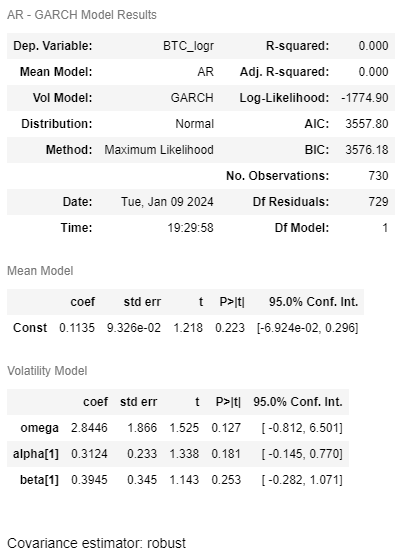

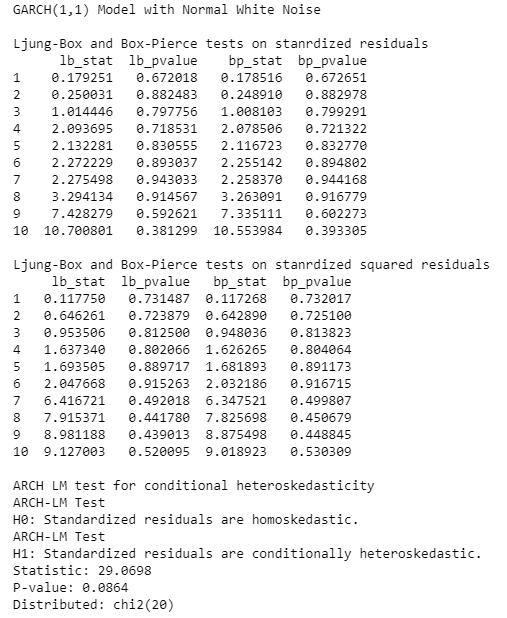

Above shows GARCH(1,1) model with normal white noise. From the model results, observed that there is not significant in one of the coefficient estimates. We will illustrate more below with diagnostic plots.

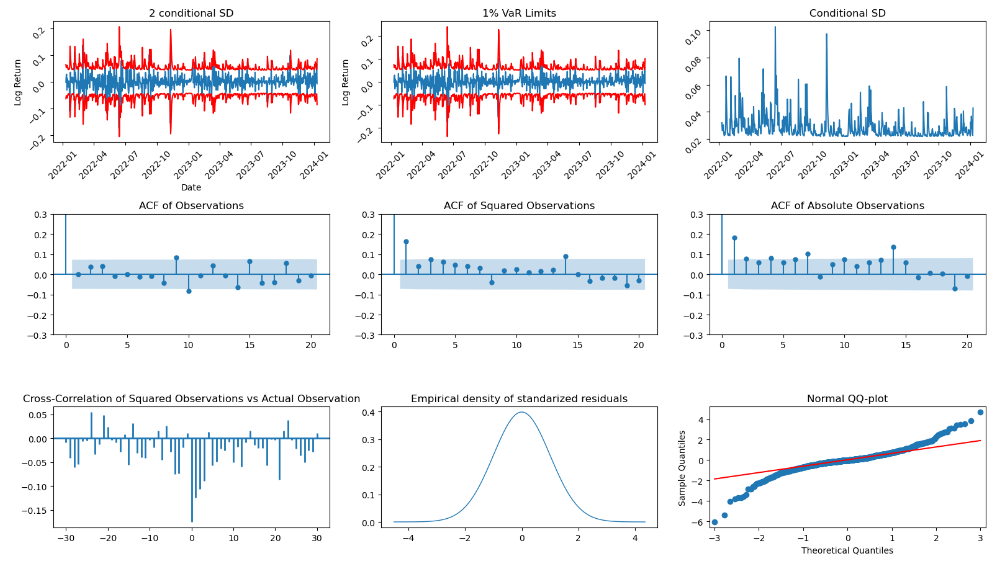

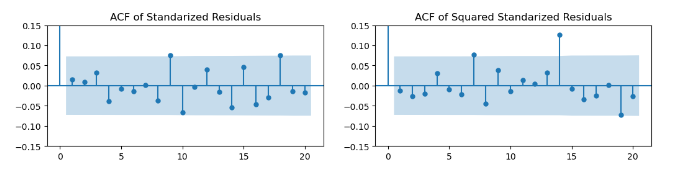

From the diagnostic plot above, observed that the normal Q-Q plot for residuals with fat-tailed distribution. To improve the model, we will run GARCH(1,1) model using Student's t-distribution.

With Student's t-distribution, all coefficient estimates are significant. This will illustrate more below with diagnostic plots.

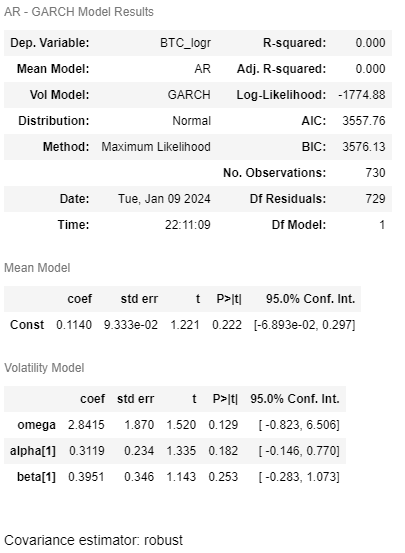

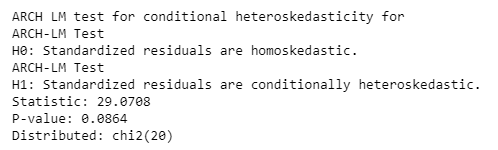

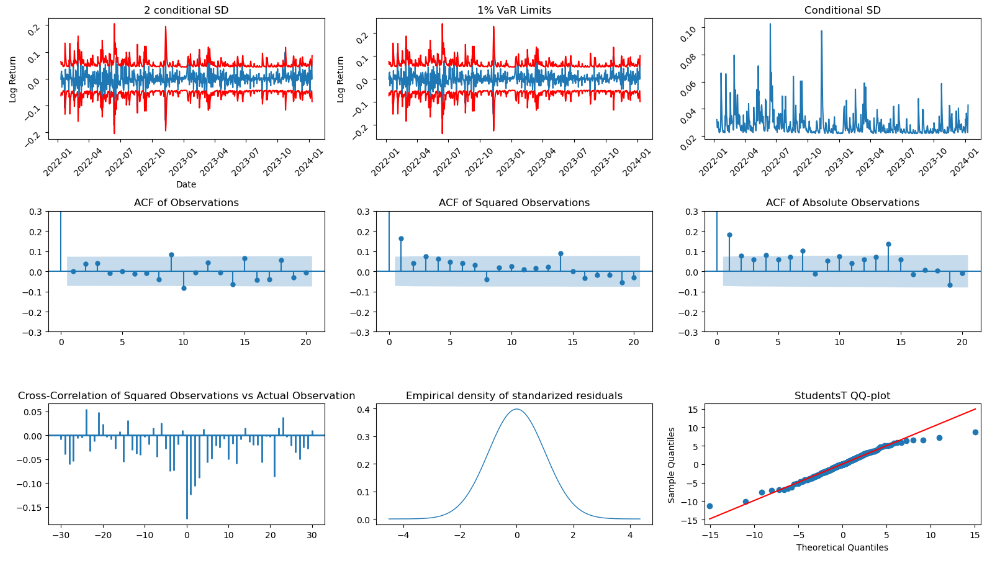

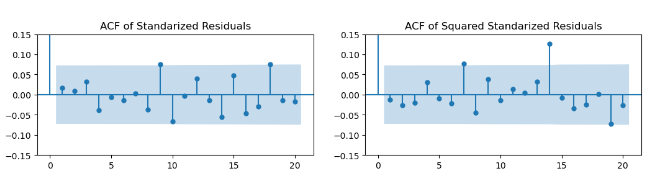

From the diagnostic plot above, Students'T QQ plot shows that the model with good fit. Thus, we can conclude that GARCH(1,1) with the Student's t white noise fits the model well.

## Damage 

While GARCH models are widely used in model and forecast volatility in financial time series data, it also have limitation and drawbacks.
1. **Assumption of Stationarity**: GARCH models assume stationary of the time series data. Therebore, before applying GARCH model for analysis, we need to apply differencing or transformations when dealing with non-stationary time series data.
2. **Model Complexity**: GARCH models increase in complexity in higher orders if high p and q are used. And model complexity will caused overfitting issue.
3. **Overfitting**: If the model fits the noises or outliers in the data, this will lead to inaccuratecy of the model prediction.
4. **Difficulty in capturing Leverage Effects**: GARCH models assume both positive and negative shocks to have a symmetric effects on volatility. With the symmetric distributiom, GARCH models failed to capture leverage effect and this asymetry.
5. **Assumption of Time Homogeneity**: GARCH models assume the volatility is constant over the time. However, In real financial markets, the volatility is dynamic and changing with the market condition. GARCH models might not able to model well with the dynamic market conditions.
6. **Limitation on Data Frequency**: GARCH models usually applied to daily or a higher frequency time series data. This model may not able to model accurately with lower frequency data like monthly or yearly data.
7. **Assumption of Normal Distribution Residuals**: GARCH models assume normal distribution of the residuals. This may caused biased parameter estimation if the residuals are skewed or deviation from normality.

## Direction
If a GARCH model does not fit well to the data, here are several approaches we can used for data manupulation in order improve on the model.
1. **Data Transformation**: Log transformation help too transform skewed data to near to a more normalized data. It also help to reduce skewness and outliers, linearize the relationships between the variables and stabilize the variance in heteroscedastic data.
2. **Remove Outliers**: Outliers in a dataset will caused lower predictive modeling performance. Outlier detection method is used to detect outliers in a dateset. Trimming can be used to exclude the outlier values from the data analysis. Statistical method like Z-score Treatment & Percentile Method also can used to identify the outliers.
3. **Resampling Frequency**: We can change the high frequency data to low frequency or vice versa depending on the suitability of the data modelling. Changing frequency can help to reduce noise for better data analysis.
4. **Differencing**: If the time series data is non-stationary and exhibits trends or seasonality, we can use data differencing to transform the data to stationary data so that to focus on the volatility patterns.
5. **Reduce Dimension of data**: If the data with high dimensionality, we can use Principal Component Analysis (PCA) to reduce the number of variables to ease for data analysis and modelling.

## Deployment
Below are the general guideline and steps to deploy a GARCH model:
1. **Data Preparation & Data Processing**: Collect the time series data that we want to analyze. Reprocess and transform the data if necessary such as remove outliers, handle missing values, differencing, resampling, data transformation and etc.
2. **Train the Model**: Dataset split to training and testing dataset. Training set used for model parameters estimation and the testing set used for model's performance evaluation. Fit the training data to the GARCH model to estimate the model parameters.
3. **Model Selection**: Identify a correct GARCH model with its appropriate  parameters (p, q). Apply optimised method to the trained data to estimate the model parameters to fit the GARCH model.
4. **Model Evaluation**: Assess the performance of the trained GARCH model by using metrics like Mean Squared Error (MSE), root Mean Squared Error (RMSE), or other suitable metrics. Besides, perform diagnostic tests on the residuals to evaluate the  goodness-of-fit of the model.
5. **Data Validation and Testing**: Validate the datset with the selected and optimised GARCH model. Conduct testing to validate and check the model's accuracy in volatility predection for different time periods.
6. **Prediction and Analysis**: Apply the GARCH model for data forecasts or conduct analysis. Use the GARCH model to predict future values
7. **Model Monitoring and Data Update**: Monitor the performance of the deployed GARCH model. Assess the model’s accuracy regularly and recalibrate the model if observed discrepancy. Continuously update latest data to the model to ensure that the data is up-to-date for analysis.
8. **Documentation**: Update documentation for the deployment process which include the model's details, parameters, testing and etc. for future data update.

## References

1. Wikipedia, "Augmented Dickey Fuller Test", https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
2. Lamzihri, Othmane. (2023). "Re: Why the GARCH model is more parsimonious as compared to ARCH ?", https://www.researchgate.net/post/Why_the_GARCH_model_is_more_parsimonious_as_compared_to_ARCH/63b5c0d541500f87e109b43f/citation/download. 
3. By The Lazy Programmer, "Time Seris Analysis and Forecasting", GARCH, https://lazyprogrammer.me/mlcompendium/timeseries/garch.html#:~:text=Disadvantages%20of%20GARCH,-Model%20selection%3A%20Selecting&text=Model%20instability%3A%20GARCH%20models%20can,models%20to%20large%20data%20sets.
4. WorldQuant University, Financial Econometrics, "M5: Time Series Modelling II:GARCH"
5. Juan Esteban de la Calle, Medium, "Best Tips and Tricks: When and Why to Use Logarithmic Transformations in Statistical Analysis", 9th May 2023, https://juandelacalle.medium.com/best-tips-and-tricks-when-and-why-to-use-logarithmic-transformations-in-statistical-analysis-9f1d72e83cfc
6. Chirag Goyal, "Outlier Detection & Removal | How to Detect & Remove Outliers", 8th Jan 2024,https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
7. Aishwarya Singh, "A Gentle Introduction to Handling a Non-Stationary Time Series in Python", 24th May 2020, https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/